# Análise exploratória



## Objetivo

O principal objetivo dessa análise é explorar e descobrir padrões, anomalias e relações entre variáveis antes de aplicar técnicas de modelagem mais avançadas. O conjunto de dados carrega informações sobre uma série de aplicativos disponíveis no Google Play Store

# Sobre os dados

Colunas do dataframe:

* App (nome dos aplicativos)
* Rating (nota no google play store)
* Size_Megabytes (tamanho do aplicativo)
* Installs	(número de vezes que foi baixado)
* Type	(se ele é pago ou gratuito)
* Price	(preço do app em dolares)
* Content Rating (classificação do conteúdo)
* Last Updated (Última vez que o app foi atualizado)
* Current Ver (versão mais recente do aplicativo)
* Android Ver (Compatibilidade com a versão do android)
* Genres_1 (Gênero do aplicativo)
* Genres_description (Subgênero do aplicativo)

# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data path

In [12]:
path = '../processed data/google_play_apps.csv'

# Data view

In [13]:
df = pd.read_csv(path)
df

,App,Rating,Size_Megabytes,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Genres_description
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,No description
1,Coloring book moana,3.9,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,No description
3,Sketch - Draw & Paint,4.5,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,No description
4,Pixel Draw - Number Art Coloring Book,4.3,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,FR Calculator,4.0,2.6,500+,Free,0.0,Everyone,"June 18, 2017",1.0.0,4.1 and up,Education,No description
8867,Sya9a Maroc - FR,4.5,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up,Education,No description
8868,Fr. Mike Schmitz Audio Teachings,5.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up,Education,No description
8869,The SCP Foundation DB fr nn5n,4.5,Not informed,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",Varies with device,Varies with device,Books,No description


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 8871 non-null   object 
 1   Rating              8871 non-null   float64
 2   Size_Megabytes      8871 non-null   object 
 3   Installs            8871 non-null   object 
 4   Type                8871 non-null   object 
 5   Price               8871 non-null   float64
 6   Content Rating      8871 non-null   object 
 7   Last Updated        8871 non-null   object 
 8   Current Ver         8871 non-null   object 
 9   Android Ver         8871 non-null   object 
 10  Genres_1            8871 non-null   object 
 11  Genres_description  8871 non-null   object 
dtypes: float64(2), object(10)
memory usage: 831.8+ KB


In [15]:
df.describe()

,Rating,Price
count,8871.000000,8871.000000
mean,4.188502,0.303464
std,0.522483,1.879174
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,79.990000


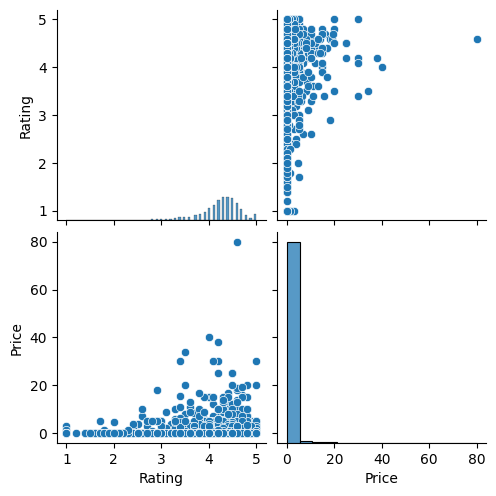

In [16]:
sns.pairplot(df);

In [17]:
valores_numericos = df.select_dtypes(include=['float64'])

In [18]:
valores_numericos.corr()

,Rating,Price
Rating,1.000000,0.019993
Price,0.019993,1.000000


In [26]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

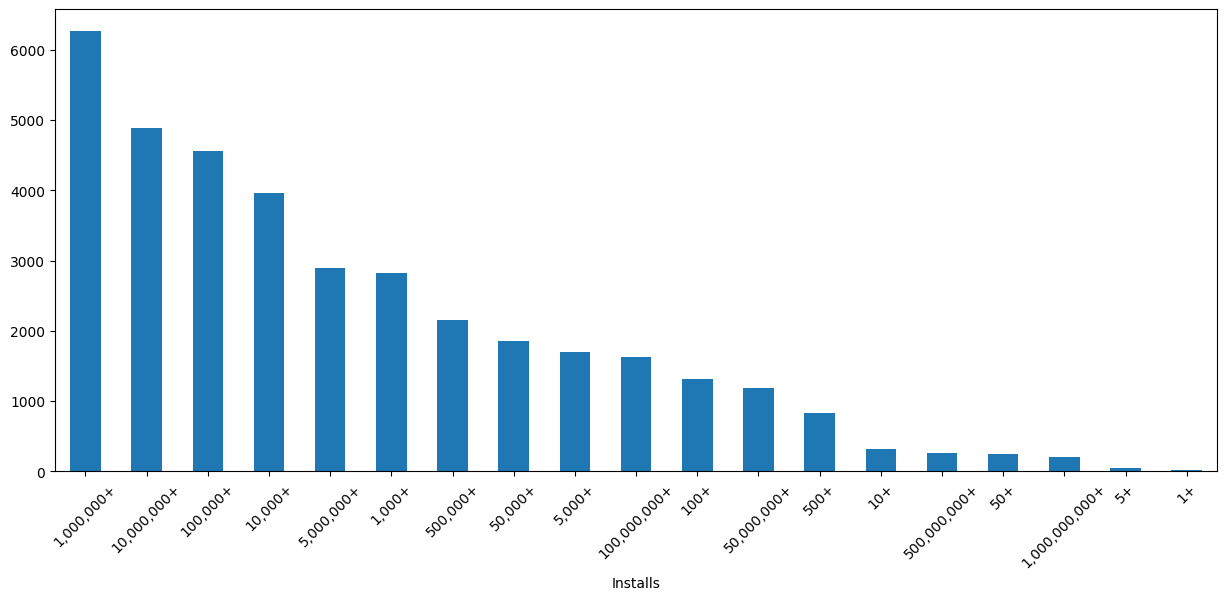

In [24]:
df.groupby('Installs')['Rating'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))
# Ajustar a rotação dos rótulos do eixo x
plt.xticks(rotation=45)
plt.show()